something about the program

In [4]:
# manage imports
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# data loading and preperation

anomaly_data = np.loadtxt("GLB.Ts+dSST_clean.txt", skiprows=9)

#print(f"Years: {anomaly_data[:, 0]}")
#print(f"\nAnnual Temperature Anomaly (in 0.01 deg C) = {anomaly_data[:, 13]}")

min_year:int = int(anomaly_data[:, 0][0])
max_year:int = int(anomaly_data[:, 0][len(anomaly_data)-1])

print(min_year, max_year)

yrs_anomaly = anomaly_data[:, 13]
yrs_anomaly /= 100.0

print(yrs_anomaly[2000-min_year])


1881 2021
0.39


The minimum supported year is 1881
The maximum supported year is 2021
-------------------------------------
Starting Year: 1881
Ending Year: 2021


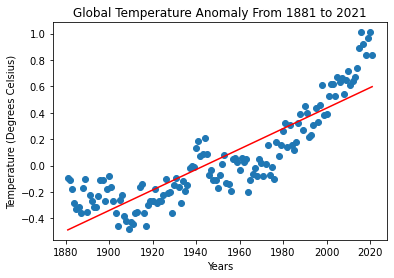

In [ ]:
# program

ex:bool = False

# display limits
print(f"The minimum supported year is {min_year}")
print(f"The maximum supported year is {max_year}")
print("-------------------------------------")

# get input
while not ex:
    try:
        raw_yr_interval:list[int] = [int(x.strip()) for x in input("Enter a time interval to calculate.\nThe interval must contain an odd number of years.\n(eg. 1992 - 1997)").replace("-", " ").split()]
        #print(raw_yr_interval)
    except ValueError:
        print("Please enter two numerical values seperated by a dash. (eg. 1992 - 1997)")
        continue

    if len(raw_yr_interval) != 2:
        print("Please enter two numerical values seperated by a dash. Whitespace is ignored. (eg. 1992 - 1997)")
        continue

    start:int = raw_yr_interval[0];end:int = raw_yr_interval[1]

    if (end - start) < 0:
        print(f"Ending year ({end}) must be greater than starting year ({start}).")
        continue
    if ((end - start) + 1) % 2 == 0:
        print(f"Range must be an odd number of years. Currently {end - start}.")
        continue
    if start < min_year:
        print(f"Starting year ({start}) is less than the minimum year ({min_year}).")
        continue
    if end > max_year:
        print(f"Ending year ({end}) is greater than the maxiumum year ({max_year}).")
        continue
    print(f"Starting Year: {start}\nEnding Year: {end}")
    ex = True

# make graph
years:list[int] = []
anomaly:list = []

for year in range(start, end+1):
    years.append(year)
    anomaly.append(yrs_anomaly[year-min_year])

plt.scatter(years, anomaly)
plt.xlabel("Years")
plt.ylabel("Temperature (Degrees Celsius)")
plt.title(f"Global Temperature Anomaly From {start} to {end}")

poly = np.poly1d(np.polyfit(years, anomaly, 1))

plt.plot(years, poly(years), "r-")

plt.show()

#print(years); print(anomaly)
